# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнила студентка группы БСТ2105 Первухина Алиса Александровна
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

1 - для генерации матрицы смежности НЕОРИЕНТРИРОВАННОГО графа,
2 - для самостоятельного ввода2
Матрица смежности:
[0, 2, 0, 0, 3, 0]
[0, 0, 4, 0, 0, 0]
[0, 0, 0, 0, 0, 5]
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 0, 0, 0]


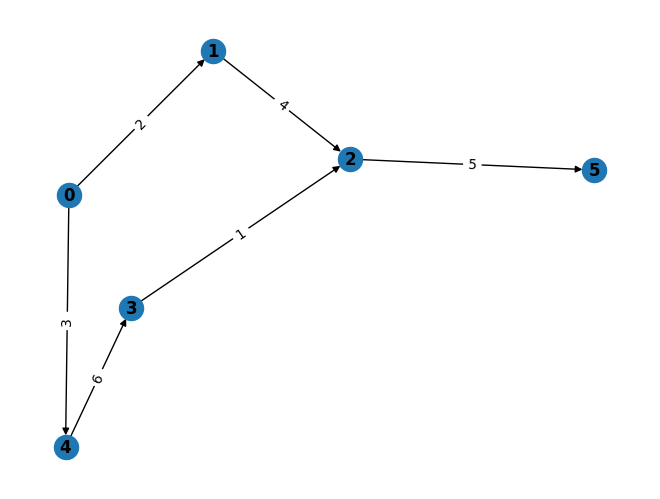

In [23]:
import random
import math
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
def generate_adj_matrix(num_nodes, density):
    """
    Генерирует матрицу смежности для ориентированного графа с заданным числом узлов и плотностью связей.
    :param num_nodes: количество узлов в графе
    :param density: плотность связей в графе (от 0 до 1)
    """
    min, max = int(input("Введите мин значение для пути: ")), int(input("Введите макс значение для пути: "))
    
    # Создаем пустую матрицу смежности
    adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    
    # Заполняем матрицу смежности ребрами
    for i in range(num_nodes):
        for k in range(0, i):
            adj_matrix[i][k] = adj_matrix[k][i]
        for j in range(i, num_nodes):
            if i == j:
                adj_matrix[i][j] = 0
            elif random.random() < density:
                weight = random.randint(min, max)
                adj_matrix[i][j] = weight
    
    return adj_matrix

choice = int(input("1 - для генерации матрицы смежности НЕОРИЕНТРИРОВАННОГО графа,\n2 - для самостоятельного ввода"))
if choice == 1:
  adj_matrix = generate_adj_matrix(int(input("Введите количество вершин: ")), 0.6)
else: 
    #adj_matrix = [[0, 2, 0, 0, 3, 0],
               #[0, 0, 4, 0, 0, 0],
                #[0, 0, 0, 0, 0, 5],
                #[0, 0, 1, 0, 0, 0],
                #[0, 0, 0, 6, 0, 0]
                #[0, 0, 0, 0, 0, 0]]
    G = nx.DiGraph()
    G.add_edge(1, 2, weight=2)
    G.add_edge(1, 5, weight=3)
    G.add_edge(3, 6, weight=5)
    G.add_edge(4, 3, weight=1)
    G.add_edge(5, 4, weight=6)
# Выводим матрицу смежности на экран
print("Матрица смежности:")
for row in adj_matrix:
    print(row)

#Выводим граф на экран 
G = nx.DiGraph(np.matrix(adj_matrix))
layout = nx.spring_layout(G)
edge_weight = nx.get_edge_attributes(G, "weight")
nx.draw(G, layout, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_weight)
plt.show()

### Алгоритм Флойда-Уоршелла

Для любых 2 вершин i и j мы можем определить сумму на основе таблицы длин

Vi,j = Vi,1 + V1,j

In [ ]:
def algorithmFloyd(adj_matrix, start, end):
  matrix = copy.deepcopy(adj_matrix)
  
  for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and adj_matrix[i][j] == 0:
                matrix[i][j] = math.inf
                # Если вершины не являются одной и той же вершиной, и в матрице смежности между 
                # ними нет ребра, то устанавливаем вес между ними равным бесконечности.

  def getPath(P, u, v):
    path = [u]
    while u != v:
        u = P[u][v]
        path.append(u)

    return path

  peekNumbers = len(matrix)      # число вершин в графе
  P = [[v for v in range(peekNumbers)] for u in range(peekNumbers)]   # начальный список предыдущих вершин для поиска кратчайших маршрутов

  for k in range(peekNumbers):
    for i in range(peekNumbers):
        for j in range(peekNumbers):
            d = matrix[i][k] + matrix[k][j]
            if matrix[i][j] > d:
                matrix[i][j] = d
                P[i][j] = k     # номер промежуточной вершины при движении от i к j

  return getPath(P, end, start)

startPos, endPos = int(input("Введите стартовую вершину: ")), int(input("Введите конечную вершину: "))
print("Кратчайший путь проходит через вершины:", algorithmFloyd(adj_matrix, startPos, endPos))


Введите стартовую вершину: 0
Введите конечную вершину: 5
Кратчайший путь проходит через вершины: [5, 4, 1, 0]


### Алгоритм Дейкстры



In [24]:
def algorithmDijkstra(adj_matrix, start, end):
  matrix = copy.deepcopy(adj_matrix)
  for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and adj_matrix[i][j] == 0:
                matrix[i][j] = math.inf

  def arg_min(T, S):  #Вспомогательная функция для возвращения вершины с минимальным весом
    amin = -1
    m = math.inf  # максимальное значение
    for i, t in enumerate(T):
        if t < m and i not in S:
            m = t
            amin = i
    return amin 

  peekNumbers = len(matrix)  # число вершин в графе
  lastLine = [math.inf]* peekNumbers   # последняя строка таблицы
  startPeek = start      # стартовая вершина (нумерация с нуля)
  seenPeeks = {startPeek}     # просмотренные вершины
  lastLine[startPeek] = 0    # нулевой вес для стартовой вершины
  M = [0]* peekNumbers   # оптимальные связи между вершинами

  while startPeek != -1:          # цикл, пока не просмотрим все вершины
    for j, dw in enumerate(matrix[startPeek]):   # перебираем все связанные вершины с вершиной v
        if j not in seenPeeks:           # если вершина еще не просмотрена
            weight = lastLine[startPeek] + dw
            if weight < lastLine[j]:
                lastLine[j] = weight
                M[j] = startPeek        # связываем вершину j с вершиной v

    startPeek = arg_min(lastLine, seenPeeks)            # выбираем следующий узел с наименьшим весом
    if startPeek >= 0:                    # выбрана очередная вершина
        seenPeeks.add(startPeek)                 # добавляем новую вершину в рассмотрение

  # формирование оптимального маршрута:
  P = [end]
  while end != start:
    end = M[P[-1]]
    P.append(end)

  return P

startPos, endPos = int(input("Введите стартовую вершину: ")), int(input("Введите конечную вершину: "))

print("Кратчайший путь проходит через вершины:", algorithmDijkstra(adj_matrix, startPos, endPos))

Введите стартовую вершину: 0
Введите конечную вершину: 5
Кратчайший путь проходит через вершины: [5, 2, 1, 0]


### Алгоритм Беллмана-Форда

In [ ]:
def bellmanFord(adj_matrix, start, end):
  matrix = copy.deepcopy(adj_matrix)
  
  for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and adj_matrix[i][j] == 0:
                matrix[i][j] = math.inf

  lambdas = []
  labels = []
  n = len(matrix)
  for i in range(n):
      lambdas.append(math.inf)
  lambdas[start] = 0

  for k in range(n):
      for i in range(n):
          for j in range(n):
              labels.append(lambdas[j] + matrix[j][i])
              # добавление в список labels значения суммы предыдущей метки и веса ребра между вершинами j и i.
          lambdas[i] = min(labels)
          #  установка минимального значения из списка labels в качестве новой метки для вершины i.
          labels.clear()
          # очистка списка labels для следующей итерации.

  return lambdas[end]

startPos, endPos = int(input("Введите стартовую вершину: ")), int(input("Введите конечную вершину: "))
print("Кратчайший путь проходит через вершины:", bellmanFord(adj_matrix, startPos, endPos))  

Алгоритм Джонсона
- Трансформировать исходный граф, добавив новую вершину и ребра с нулевыми весами из этой вершины во все остальные вершины графа.
- Запустить алгоритм Беллмана-Форда на трансформированном графе, чтобы найти кратчайшие пути от новой вершины до всех остальных вершин.
- Скорректировать веса исходных ребер на основе расстояний до новой вершины, так что они все неотрицательны.
- Запустить алгоритм Дейкстры на скорректированном графе для каждой вершины в качестве исходной, чтобы найти кратчайшие пути до всех остальных вершин.

In [22]:

def johnson(adj_matrix, start, end):
    matrix = copy.deepcopy(adj_matrix)
    # Все ребра с нулевым весом заменяются на бесконечность, чтобы избежать отрицательных циклов
    for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if matrix[i][j] == 0 and i != j:
                    matrix[i][j] = math.inf
    negatives = 0
    # Есть ли отрицательные веса в графе ?
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] < 0:
                negatives = 1
                break
    # Если есть, то производится трансформация графа (добавим новую вершину и ребра с нулевыми весами из этой вершины во все остальные вершины графа
    if negatives != 0:
        # Добавляем новую вершину и ребра с нулевыми весами из этой вершины во все остальные вершины графа.
        matrix.append([math.inf for i in range(len(matrix))])
        for i in range(len(matrix)):
            matrix[i].append(0)
        # Создаем список вершин графа и сортируем его.
        nodes = []
        for i in range(len(adj_matrix.nodes)):
            nodes.append(list(adj_matrix.nodes)[i]['id'])
        nodes.sort()
        # Для каждой вершины находим длины кратчайших путей до всех остальных вершин в новом графе.
        lens = []
        for i in range(len(nodes)):
            lens.append(bellmanFord(matrix, len(matrix), nodes[i]))
        for i in range(len(matrix)):
            matrix[i].pop()
        matrix.pop()
        # применяем модификацию Дейкстры, чтобы скорректировать веса ребер в новом графе.
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if matrix[i][j] != 0 and matrix[i][j] != math.inf:
                    matrix[i][j] = matrix[i][j] + lens[j] - lens[i]
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if matrix[i][j] != math.inf and i != j:
                    matrix[i][j] += 1

    res = algorithmDijkstra(matrix, start, end)
    return res

startPos, endPos = int(input("Введите стартовую вершину: ")), int(input("Введите конечную вершину: "))
print("Кратчайший путь проходит через вершины:", johnson(adj_matrix, startPos, endPos))  

Введите стартовую вершину: 0
Введите конечную вершину: 5
Кратчайший путь проходит через вершины: [5, 2, 1, 0]


Алгоритм Левита


Алгоритм Йена

Оценка временной сложности

In [ ]:
res = []
for i in range(6,9):

### Вывод
В ходе данной лабораторной работы были реализованы алгоритмы нахождения кратчайшего пути на графе и определены зависимости времени исполнения алгоритма от числа узлов и ребер графа: